<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://www.usergioarboleda.edu.co/wp-content/uploads/ultimatum/imagens/logo-mobile-UniversidadSergioArboleda.png"
width="750" height="250">
</img>
<br>
<i><b>Docente:</b> Juan Pablo Ospina.</i>
<br>
<i><b>Asignatura:</b> Vida artificial</i>
<br>
<i><b>Estudiantes:</b> Chiara Valenzuela, Andrea Terraza y Miguel Thomas</i>
<br>
<i><b>Tema:</b>
Geometría Fractal</i>
<br>
<i><b>Grupo:</b> Dracarys (A)</i>
<br>
<img src='https://i.pinimg.com/originals/ba/78/85/ba788588817b74ef4713383ceac3e0ef.gif'>
<br>
<i>18/10/24</i>
</FONT>
</p>

## Importaciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [2]:
epsilons = np.logspace(-3, -1, 10)
def box_counting(points, epsilon):
    """
    Realiza el conteo de cajas usando el método de box-counting.
    'points' es un array de coordenadas 2D y 'epsilon' es el tamaño de las cajas.
    """
    # Normalizar los puntos para que estén en una caja de 1x1
    min_values = np.min(points, axis=0)
    max_values = np.max(points, axis=0)
    normalized_points = (points - min_values) / (max_values - min_values)

    # Calcular cuántas cajas de tamaño epsilon necesitamos
    num_boxes = np.ceil(1 / epsilon).astype(int)

    # Inicializamos un conjunto para contar las cajas ocupadas
    occupied_boxes = set()

    # Recorremos los puntos y determinamos en qué caja cae cada uno
    for point in normalized_points:
        # Para cada punto, determinamos la caja correspondiente
        box_index = tuple((point // epsilon).astype(int))
        occupied_boxes.add(box_index)

    return len(occupied_boxes)

## Ejercicio 1

A partir de un triángulo construya un programa que:
1. Marque un punto $𝑝_0$
seleccionado al azar al interior del triángulo.
2. Seleccione de manera aleatoria uno de los vértices 𝑣 del triángulo
3. Marque un nuevo punto $𝑝_1$ que corresponda al punto medio entre
el punto $𝑝_0$
y el vértice 𝑣
4. Repita los puntos 2 y 3 con el último punto generado
5. Intente estimar la dimensión del patrón generado

In [3]:
# Definir los vértices del triángulo
v1 = np.array([0, 0])
v2 = np.array([1, 0])
v3 = np.array([0.5, np.sqrt(3)/2])
vertices = [v1, v2, v3]  # Lista de vértices

# Inicializar una lista para almacenar los puntos
points1 = []

# Punto inicial p0 al azar dentro del triángulo
p0 = np.random.rand(2)
if p0[0] + p0[1] > 1:
    p0[0] = 1 - p0[0]
    p0[1] = 1 - p0[1]
p0[1] *= np.sqrt(3) / 2
points1.append(p0)

# Número de iteraciones
iterations = 100000

# Generar los puntos del patrón
current_point = p0
for _ in range(iterations):
    # Seleccionar un índice de los vértices al azar
    vertex_index = np.random.choice([0, 1, 2])

    # Calcular el punto medio entre el punto actual y el vértice seleccionado
    next_point = (current_point + vertices[vertex_index]) / 2

    # Guardar el nuevo punto y actualizar el punto actual
    points1.append(next_point)
    current_point = next_point

# Convertir la lista de puntos a un arreglo de numpy
points1 = np.array(points1)

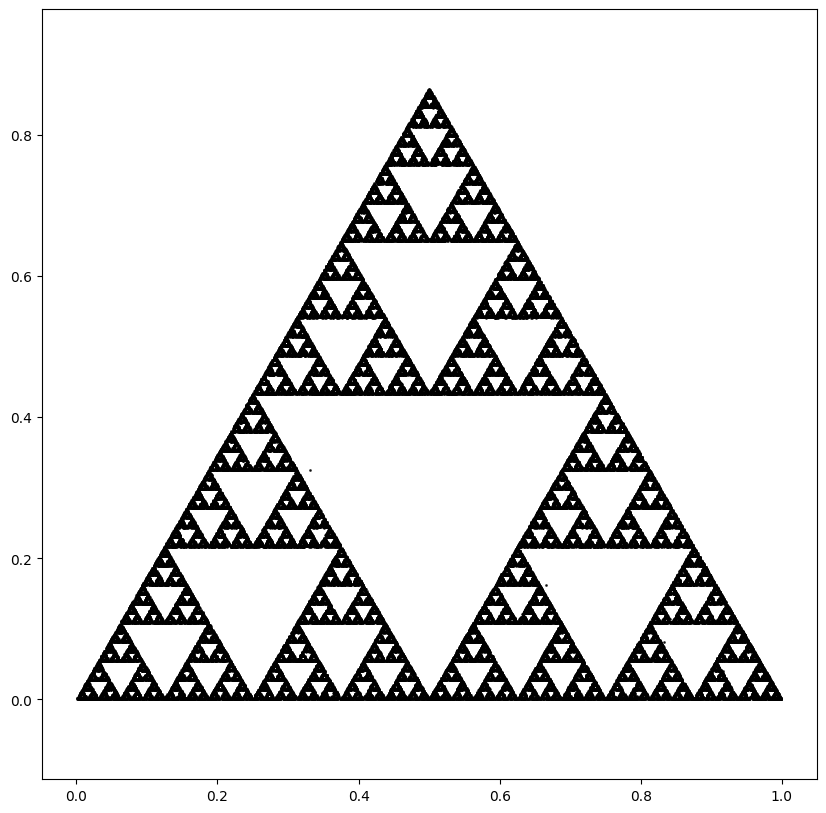

In [4]:
plt.figure(figsize=(10, 10))
plt.scatter(points1[:, 0], points1[:, 1], color='black', s=1, alpha=0.75)  # Color y transparencia
plt.axis('equal')
plt.margins(x=0.05, y=0.05)
plt.show()

In [5]:
box_counts = [box_counting(points1, epsilon) for epsilon in epsilons]

# Ajuste lineal en una escala log-log para estimar la dimensión fractal
log_eps = np.log(1 / epsilons)
log_counts = np.log(box_counts)
dim_fractal, _ = np.polyfit(log_eps, log_counts, 1)

print(f"Estimación de la dimensión fractal: {dim_fractal}")

Estimación de la dimensión fractal: 1.524981341155504


## Ejercicio 2

A partir de un cuadrado construya un programa que:
1. Marque un punto 𝑝0
seleccionado al azar al interior del cuadrado.
2. Seleccione de manera aleatoria uno de los vértices 𝑣 del cuadrado
3. Marque un nuevo punto 𝑝1 que corresponda a las 1/2 de la
distancia desde punto 𝑝0
al vértice 𝑣
4. Repita los puntos 2 y 3 ahora con el último punto generado
5. Intente estimar la dimensión del patrón generado

In [6]:
vertices = np.array([[-1, -1], [1, -1], [1, 1], [-1, 1]])

# Generar un punto inicial aleatorio dentro del cuadrado
p0 = np.random.uniform(-1, 1, size=2)

# Lista para almacenar los puntos generados
points2 = [p0]

# Definir número de iteraciones
n_iter = 1000000

# Generar los puntos
for _ in range(n_iter):
    # Seleccionar un vértice al azar
    vertice = random.choice(vertices)

    # Tomar el último punto generado
    ultimo_punto = points2[-1]

    # Calcular el nuevo punto como la mitad de la distancia entre el último punto y el vértice seleccionado
    nuevo_punto = (ultimo_punto + vertice) / 2
    points2.append(nuevo_punto)

# Convertir la lista de puntos a un arreglo NumPy
points2 = np.array(points2)

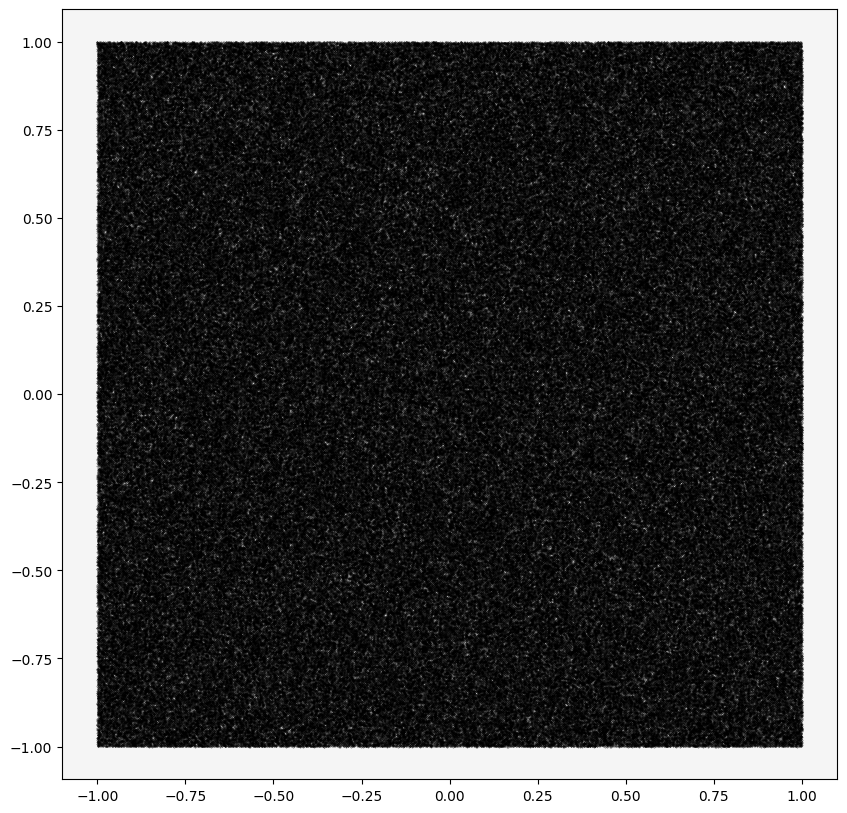

In [7]:
# Graficar el patrón generado
plt.figure(figsize=(10, 10))
plt.scatter(points2[:, 0], points2[:, 1], color='black', s=0.1, alpha=0.6)
plt.gca().set_facecolor('#f5f5f5')
plt.axis('equal')
plt.margins(x=0.05, y=0.05)
plt.show()

In [ ]:
box_counts = [box_counting(points2, epsilon) for epsilon in epsilons]

# Ajuste lineal en una escala log-log para estimar la dimensión fractal
log_eps = np.log(1 / epsilons)
log_counts = np.log(box_counts)
dim_fractal, _ = np.polyfit(log_eps, log_counts, 1)

print(f"Estimación de la dimensión fractal: {dim_fractal}")

## Ejercicio 3

A partir de un cuadrado construya un programa que:
1. Marque un punto 𝑝0
seleccionado al azar al interior del cuadrado.
2. Seleccione de manera aleatoria uno de los vértices 𝑣 del cuadrado o
uno de los puntos medios de cada arista
3. Marque un nuevo punto 𝑝1 que corresponda a las 2/3 de la
distancia entre el punto 𝑝0
y el vértice 𝑣
4. Repita los puntos 2 y 3 ahora con el último punto generado
5. Intente estimar la dimensión del patrón generado

In [ ]:
# Definir los vértices del cuadrado
v1 = np.array([0, 0])
v2 = np.array([1, 0])
v3 = np.array([1, 1])
v4 = np.array([0, 1])

# Definir los puntos medios de las aristas del cuadrado
m1 = (v1 + v2) / 2  # Punto medio de v1-v2
m2 = (v2 + v3) / 2  # Punto medio de v2-v3
m3 = (v3 + v4) / 2  # Punto medio de v3-v4
m4 = (v4 + v1) / 2  # Punto medio de v4-v1

# Lista que incluye vértices y puntos medios
points_to_choose = [v1, v2, v3, v4, m1, m2, m3, m4]

# Inicializar una lista para almacenar los puntos
points3 = []

# Punto inicial p0 al azar dentro del cuadrado
p0 = np.random.rand(2)
points3.append(p0)

# Número de iteraciones
iterations = 100000

# Generar los puntos del patrón
current_point = p0
for _ in range(iterations):
    # Seleccionar un punto (vértice o punto medio) al azar
    target_point = points_to_choose[np.random.choice(len(points_to_choose))]

    # Calcular el punto a 2/3 de la distancia entre el punto actual y el punto seleccionado
    next_point = current_point + (2/3) * (target_point - current_point)

    # Guardar el nuevo punto y actualizar el punto actual
    points3.append(next_point)
    current_point = next_point

# Convertir la lista de puntos a un arreglo de numpy
points3 = np.array(points3)

In [ ]:
# Graficar el patrón generado
plt.figure(figsize=(8, 8))
plt.scatter(points3[:, 0], points3[:, 1], color='black', s=0.5)
plt.margins(x=0.05, y=0.05)
plt.axis('equal')
plt.show()

In [ ]:
box_counts = [box_counting(points3, epsilon) for epsilon in epsilons]

# Ajuste lineal en una escala log-log para estimar la dimensión fractal
log_eps = np.log(1 / epsilons)
log_counts = np.log(box_counts)
dim_fractal, _ = np.polyfit(log_eps, log_counts, 1)

print(f"Estimación de la dimensión fractal: {dim_fractal}")

## Ejercicio 4

A partir de un cuadrado construya un programa que:
1. Marque un punto 𝑝0
seleccionado al azar al interior del cuadrado.
2. Seleccione de manera aleatoria uno de los vértices 𝑣 del cuadrado
3. Marque un nuevo punto 𝑝1 que corresponda a las 2/3 de la
distancia desde punto 𝑝0
al vértice 𝑣
4. Repita los puntos 2 y 3 ahora con el último punto generado
garantizando que el nuevo vértice seleccionado es diferente al
utilizando en la iteración anterior
5. Intente estimar la dimensión del patrón generado

In [ ]:
# Definir los vértices del cuadrado
v1 = np.array([0, 0])
v2 = np.array([1, 0])
v3 = np.array([1, 1])
v4 = np.array([0, 1])
vertices = [v1, v2, v3, v4]  # Lista de vértices

# Inicializar una lista para almacenar los puntos
points4 = []

# Punto inicial p0 al azar dentro del cuadrado
p0 = np.random.rand(2)
points4.append(p0)

# Número de iteraciones
iterations = 100000

# Generar los puntos del patrón, asegurando que no se repita el vértice de la iteración anterior
current_point = p0
previous_index = -1  # Índice para llevar control del vértice anterior

for _ in range(iterations):
    # Seleccionar un vértice al azar, asegurándose de que sea diferente al anterior
    available_indices = [i for i in range(len(vertices)) if i != previous_index]
    vertex_index = np.random.choice(available_indices)

    # Calcular el punto a 2/3 de la distancia entre el punto actual y el vértice seleccionado
    next_point = current_point + (2/3) * (vertices[vertex_index] - current_point)

    # Guardar el nuevo punto y actualizar el punto actual y el índice previo
    points4.append(next_point)
    current_point = next_point
    previous_index = vertex_index

# Convertir la lista de puntos a un arreglo de numpy
points4 = np.array(points4)

In [ ]:
# Graficar el patrón generado
plt.figure(figsize=(8, 8))
plt.scatter(points4[:, 0], points4[:, 1], color='blue', s=0.5)
plt.axis('equal')
plt.show()

In [ ]:
# Calcular la dimensión fractal
box_counts = [box_counting(points4, epsilon) for epsilon in epsilons]

# Ajuste lineal en una escala log-log para estimar la dimensión fractal
log_eps = np.log(1 / epsilons)
log_counts = np.log(box_counts)
dim_fractal, _ = np.polyfit(log_eps, log_counts, 1)

print(f"Estimación de la dimensión fractal: {dim_fractal}")

## Ejercicio 5

A partir de un cuadrado construya un programa que:
1. Marque un punto 𝑝0
seleccionado al azar al interior del cuadrado.
2. Seleccione de manera aleatoria uno de los vértices 𝑣 del cuadrado
3. Marque un nuevo punto 𝑝1 que corresponda a la mitad de la
distancia desde punto 𝑝0
al vértice 𝑣
4. Repita los puntos 2 y 3 ahora con el último punto generado
garantizando que el nuevo vértice no es vecino del seleccionado en
la iteración anterior si los últimos dos vértices fueron iguales
5. Intente estimar la dimensión del patrón generado

In [ ]:
vertices = np.array([[-1, -1], [1, -1], [1, 1], [-1, 1]])

# Generar un punto inicial aleatorio dentro del cuadrado
p0 = np.random.uniform(-1, 1, size=2)

# Lista para almacenar los puntos generados
points5 = [p0]

# Función para verificar si dos vértices son vecinos
def son_vecinos(v1, v2):
    return abs(v1 - v2) == 1 or abs(v1 - v2) == 3

# Definir número de iteraciones
n_iter = 100000
ultimo_vertice = -1

# Generar los puntos
for _ in range(n_iter):
    # Seleccionar un vértice al azar que no sea vecino del anterior
    while True:
        vertice_index = random.randint(0, 3)
        if not son_vecinos(vertice_index, ultimo_vertice):
            break

    # Tomar el último punto generado
    ultimo_punto = points5[-1]

    # Calcular el nuevo punto como la mitad de la distancia entre el último punto y el vértice seleccionado
    nuevo_punto = (ultimo_punto + vertices[vertice_index]) / 2
    points5.append(nuevo_punto)

    # Actualizar el último vértice seleccionado
    ultimo_vertice = vertice_index

# Convertir la lista de puntos a un arreglo NumPy
points5 = np.array(points5)

In [ ]:
# Graficar el patrón generado
plt.figure(figsize=(10, 10))
plt.scatter(points5[:, 0], points5[:, 1], color='royalblue', s=0.1, alpha=0.6)
plt.gca().set_facecolor('#f5f5f5')
plt.margins(x=0.05, y=0.05)
plt.axis('equal')
plt.show()

In [ ]:
box_sizes = np.logspace(-2, 0, num=10)
counts = [box_counting(points5, size) for size in box_sizes]

# Ajustar la pendiente de log(counts) vs log(box_sizes) para obtener la dimensión fractal
coeffs = np.polyfit(np.log(box_sizes), np.log(counts), 1)
dimension_fractal = -coeffs[0]

print(f"Dimensión fractal estimada: {dimension_fractal:.3f}")

## Ejercicio 6

A partir de un pentágono construya un programa que:
1. Marque un punto 𝑝0
seleccionado al azar al interior de un
pentágono regular.
2. Seleccione de manera aleatoria uno de los vértices 𝑣 del pentágono
3. Marque un nuevo punto 𝑝1 que corresponda al punto medio entre
el punto 𝑝0
y el vértice 𝑣
4. Repita los puntos 2 y 3 ahora con el último punto generado
garantizando que el nuevo vértice seleccionado es diferente al
utilizando en la iteración anterior
5. Intente estimar la dimensión del patrón generado

In [ ]:
# Función para calcular los vértices de un pentágono regular
def pentagon_vertices(center, radius):
    angles = np.linspace(0, 2 * np.pi, 6)[:-1]  # Dividir en 5 partes iguales
    vertices = []
    for angle in angles:
        x = center[0] + radius * np.cos(angle)
        y = center[1] + radius * np.sin(angle)
        vertices.append(np.array([x, y]))
    return vertices

In [ ]:
# Parámetros del pentágono
center = np.array([0.5, 0.5])  # Centro del pentágono
radius = 0.5  # Radio
vertices = pentagon_vertices(center, radius)

# Inicializar una lista para almacenar los puntos
points6 = []

# Punto inicial p0 seleccionado al azar dentro del pentágono
p0 = center + (np.random.rand(2) - 0.5) * radius
points6.append(p0)

# Número de iteraciones
iterations = 100000

# Generar los puntos del patrón
current_point = p0
previous_index = -1  # Índice para controlar el vértice anterior

for _ in range(iterations):
    # Seleccionar un vértice al azar, diferente al anterior
    available_indices = [i for i in range(len(vertices)) if i != previous_index]
    vertex_index = np.random.choice(available_indices)

    # Calcular el punto medio entre el punto actual y el vértice seleccionado
    next_point = (current_point + vertices[vertex_index]) / 2

    # Guardar el nuevo punto y actualizar el punto actual y el índice previo
    points6.append(next_point)
    current_point = next_point
    previous_index = vertex_index

# Convertir la lista de puntos a un arreglo de numpy
points6 = np.array(points6)

In [ ]:
# Graficar el patrón generado
plt.figure(figsize=(8, 8))
plt.scatter(points6[:, 0], points6[:, 1], color='royalblue', s=0.5)
plt.axis('equal')
plt.show()

In [ ]:
# Calcular la dimensión fractal
box_counts = [box_counting(points6, epsilon) for epsilon in epsilons]

# Ajuste lineal en una escala log-log para estimar la dimensión fractal
log_eps = np.log(1 / epsilons)
log_counts = np.log(box_counts)
dim_fractal, _ = np.polyfit(log_eps, log_counts, 1)

print(f"Estimación de la dimensión fractal: {dim_fractal}")

## Ejercicio 7

Modifique todos los ejercicios anteriores y genere las
visualizaciones en 3 dimensiones. Para esto en vez de seleccionar
un triangulo seleccione una pirámide, en vez de un cuadrado un
cubo etc.

### Ejercicio 1

In [ ]:
# Definir los vértices de la pirámide
v1 = np.array([0, 0, 0])  # Base
v2 = np.array([1, 0, 0])  # Base
v3 = np.array([0.5, np.sqrt(3)/2, 0])  # Base
v4 = np.array([0.5, np.sqrt(3)/6, 1])  # Vértice superior
vertices = [v1, v2, v3, v4]

# Inicializar una lista para almacenar los puntos
points1_2 = []

# Punto inicial p0 al azar dentro de la pirámide
p0 = np.random.rand(3)
if p0[0] + p0[1] > 1:
    p0[0] = 1 - p0[0]
    p0[1] = 1 - p0[1]
p0[2] *= 1
points1_2.append(p0)

# Número de iteraciones
iterations = 100000

# Generar los puntos del patrón
current_point = p0
for _ in range(iterations):
    # Seleccionar un índice de los vértices al azar
    vertex_index = np.random.choice([0, 1, 2, 3])

    # Calcular el punto medio entre el punto actual y el vértice seleccionado
    next_point = (current_point + vertices[vertex_index]) / 2

    # Guardar el nuevo punto y actualizar el punto actual
    points1_2.append(next_point)
    current_point = next_point

# Convertir la lista de puntos a un arreglo de numpy
points1_2 = np.array(points1_2)

In [ ]:
# Crear un gráfico interactivo con Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=points1_2[:, 0],
    y=points1_2[:, 1],
    z=points1_2[:, 2],
    mode='markers',
    marker=dict(size=1, color='black')
)])

fig.update_layout(scene=dict(aspectmode='cube'))
fig.show()

### Ejercicio 2

In [ ]:
# Definir los vértices del cubo
vertices = np.array([[-1, -1, -1], [1, -1, -1], [1, 1, -1], [-1, 1, -1], [-1, -1, 1], [1, -1, 1], [1, 1, 1], [-1, 1, 1]])

# Generar un punto inicial aleatorio dentro del cubo
p0 = np.random.uniform(-1, 1, size=3)

# Lista para almacenar los puntos generados
points2_2 = [p0]

# Definir número de iteraciones
n_iter = 1000000

# Generar los puntos
for _ in range(n_iter):
    # Seleccionar un vértice al azar
    vertice = random.choice(vertices)

    # Tomar el último punto generado
    ultimo_punto = points2_2[-1]

    # Calcular el nuevo punto como la mitad de la distancia entre el último punto y el vértice seleccionado
    nuevo_punto = (ultimo_punto + vertice) / 2
    points2_2.append(nuevo_punto)

# Convertir la lista de puntos a un arreglo NumPy
points2_2 = np.array(points2_2)

In [ ]:
# Crear un gráfico interactivo con Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=points2_2[:, 0],
    y=points2_2[:, 1],
    z=points2_2[:, 2],
    mode='markers',
    marker=dict(size=1, color='black')
)])

fig.update_layout(scene=dict(aspectmode='cube'))
fig.show()

### Ejercicio 3

In [ ]:
# Definir los vértices del cubo
v1 = np.array([0, 0, 0])
v2 = np.array([1, 0, 0])
v3 = np.array([1, 1, 0])
v4 = np.array([0, 1, 0])
v5 = np.array([0, 0, 1])
v6 = np.array([1, 0, 1])
v7 = np.array([1, 1, 1])
v8 = np.array([0, 1, 1])

# Definir los puntos medios de las aristas del cubo
m1 = (v1 + v2) / 2
m2 = (v2 + v3) / 2
m3 = (v3 + v4) / 2
m4 = (v4 + v1) / 2
m5 = (v1 + v5) / 2
m6 = (v2 + v6) / 2
m7 = (v3 + v7) / 2
m8 = (v4 + v8) / 2
m9 = (v5 + v6) / 2
m10 = (v6 + v7) / 2
m11 = (v7 + v8) / 2
m12 = (v8 + v5) / 2

# Lista que incluye vértices y puntos medios
points_to_choose = [v1, v2, v3, v4, v5, v6, v7, v8, m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12]

# Inicializar una lista para almacenar los puntos
points3_2 = []

# Punto inicial p0 al azar dentro del cubo
p0 = np.random.rand(3)
points3_2.append(p0)

# Número de iteraciones
iterations = 1000000

# Generar los puntos del patrón
current_point = p0
for _ in range(iterations):
    # Seleccionar un punto (vértice o punto medio) al azar
    target_point = points_to_choose[np.random.choice(len(points_to_choose))]

    # Calcular el punto a 2/3 de la distancia entre el punto actual y el punto seleccionado
    next_point = current_point + (2/3) * (target_point - current_point)

    # Guardar el nuevo punto y actualizar el punto actual
    points3_2.append(next_point)
    current_point = next_point

# Convertir la lista de puntos a un arreglo de numpy
points3_2 = np.array(points3_2)

In [ ]:
# Crear un gráfico interactivo con Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=points3_2[:, 0],
    y=points3_2[:, 1],
    z=points3_2[:, 2],
    mode='markers',
    marker=dict(size=1, color='black')
)])

fig.update_layout(scene=dict(aspectmode='cube'))
fig.show()

### Ejercicio 4

In [ ]:
# Definir los vértices del cubo
vertices = np.array([[-1, -1, -1], [1, -1, -1], [1, 1, -1], [-1, 1, -1], [-1, -1, 1], [1, -1, 1], [1, 1, 1], [-1, 1, 1]])

# Generar un punto inicial aleatorio dentro del cubo
p0 = np.random.uniform(-1, 1, size=3)
points4_2 = [p0]

# Número de iteraciones
iterations = 100000
previous_index = -1

# Generar los puntos del patrón
current_point = p0
for _ in range(iterations):
    available_indices = [i for i in range(len(vertices)) if i != previous_index]
    vertex_index = np.random.choice(available_indices)
    next_point = current_point + (2/3) * (vertices[vertex_index] - current_point)
    points4_2.append(next_point)
    current_point = next_point
    previous_index = vertex_index

# Convertir la lista de puntos a un arreglo de numpy
points4_2 = np.array(points4_2)

In [ ]:
# Crear un gráfico interactivo con Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=points4_2[:, 0],
    y=points4_2[:, 1],
    z=points4_2[:, 2],
    mode='markers',
    marker=dict(size=1, color='black')
)])

fig.update_layout(scene=dict(aspectmode='cube'))
fig.show()

### Ejercicio 5

In [ ]:
# Definir los vértices de un tetraedro
vertices = np.array([[0, 0, 0], [1, 0, 0], [0.5, np.sqrt(3)/2, 0], [0.5, np.sqrt(3)/6, np.sqrt(6)/3]])

# Generar un punto inicial aleatorio dentro del tetraedro
p0 = np.random.rand(3)
points5_3d = [p0]

# Función para verificar si dos vértices son vecinos (en este caso se pueden definir como conectados por aristas)
def son_vecinos(v1, v2):
    # Condición de vecindad basada en el índice
    return abs(v1 - v2) == 1 or (v1 == 0 and v2 == 3) or (v2 == 0 and v1 == 3)

# Definir número de iteraciones
n_iter = 100000
ultimo_vertice = -1

# Generar los puntos
for _ in range(n_iter):
    # Seleccionar un vértice al azar que no sea vecino del anterior
    while True:
        vertice_index = random.randint(0, 3)
        if not son_vecinos(vertice_index, ultimo_vertice):
            break

    # Tomar el último punto generado
    ultimo_punto = points5_3d[-1]

    # Calcular el nuevo punto como la mitad de la distancia entre el último punto y el vértice seleccionado
    nuevo_punto = (ultimo_punto + vertices[vertice_index]) / 2
    points5_3d.append(nuevo_punto)

    # Actualizar el último vértice seleccionado
    ultimo_vertice = vertice_index

# Convertir la lista de puntos a un arreglo NumPy
points5_3d = np.array(points5_3d)

In [ ]:
# Crear un gráfico interactivo con Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=points5_3d[:, 0],
    y=points5_3d[:, 1],
    z=points5_3d[:, 2],
    mode='markers',
    marker=dict(size=1, color='black')
)])

fig.update_layout(scene=dict(aspectmode='cube'))
fig.show()

### Ejercicio 6

In [ ]:
# Función para calcular los vértices de una pirámide pentagonal
def pentagonal_pyramid_vertices(center, radius, height):
    angles = np.linspace(0, 2 * np.pi, 6)[:-1]
    vertices = []
    for angle in angles:
        x = center[0] + radius * np.cos(angle)
        y = center[1] + radius * np.sin(angle)
        vertices.append(np.array([x, y, 0]))
    # Añadir el vértice superior de la pirámide
    vertices.append(np.array([center[0], center[1], height]))
    return vertices

# Parámetros de la pirámide
center = np.array([0, 0])
radius = 1
height = 1
vertices = pentagonal_pyramid_vertices(center, radius, height)

# Inicializar una lista para almacenar los puntos
points6_3d = []

# Punto inicial p0 seleccionado al azar dentro de la pirámide
p0 = center + (np.random.rand(2) - 0.5) * radius
p0 = np.append(p0, np.random.rand() * height)  # Añadir una coordenada z
points6_3d.append(p0)

# Número de iteraciones
iterations = 100000
current_point = p0
previous_index = -1  # Índice para controlar el vértice anterior

for _ in range(iterations):
    # Seleccionar un vértice al azar, diferente al anterior
    available_indices = [i for i in range(len(vertices)) if i != previous_index]
    vertex_index = np.random.choice(available_indices)

    # Calcular el punto medio entre el punto actual y el vértice seleccionado
    next_point = (current_point + vertices[vertex_index]) / 2

    # Guardar el nuevo punto y actualizar el punto actual y el índice previo
    points6_3d.append(next_point)
    current_point = next_point
    previous_index = vertex_index

# Convertir la lista de puntos a un arreglo de numpy
points6_3d = np.array(points6_3d)

In [ ]:
# Crear un gráfico interactivo con Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=points6_3d[:, 0],
    y=points6_3d[:, 1],
    z=points6_3d[:, 2],
    mode='markers',
    marker=dict(size=1, color='black')
)])

fig.update_layout(scene=dict(aspectmode='cube'))
fig.show()

## Ejercicio 8

Para un punto (𝑥, 𝑦) genere una función iterada que retorne:

| **Probabilidad**         | **Transformaciones**                  |
|--------------------------|---------------------------------------|
| **1 % de las veces**     | $x \to 0$                             |
|                          | $y \to 0.16y$                         |
| **85 % de las veces**    | $x \to 0.85x + 0.04y$                 |
|                          | $y \to -0.04x + 0.85y + 1.6$          |
| **7 % de las veces**     | $x \to 0.2x - 0.26y$                  |
|                          | $y \to 0.23x + 0.22y + 1.6$           |
| **7 % de las veces**     | $x \to -0.15x + 0.28y$                |
|                          | $y \to 0.26x + 0.24y + 0.44$          |

Visualice todos los puntos generados

In [ ]:
# Definir la función iterada que aplica las transformaciones basadas en las probabilidades
def iterar_punto(x, y):
    r = random.random()
    if r < 0.01:  # 1 % de las veces
        x_new = 0
        y_new = 0.16 * y
    elif r < 0.86:  # 85 % de las veces
        x_new = 0.85 * x + 0.04 * y
        y_new = -0.04 * x + 0.85 * y + 1.6
    elif r < 0.93:  # 7 % de las veces
        x_new = 0.2 * x - 0.26 * y
        y_new = 0.23 * x + 0.22 * y + 1.6
    else:  # 7 % de las veces
        x_new = -0.15 * x + 0.28 * y
        y_new = 0.26 * x + 0.24 * y + 0.44
    return x_new, y_new

In [ ]:
# Definir número de iteraciones
n_iter = 100000

# Inicializar punto (x, y)
x, y = 0, 0

# Almacenar todos los puntos generados
points_h = []

# Generar puntos
for _ in range(n_iter):
    x, y = iterar_punto(x, y)
    points_h.append([x, y])

# Convertir lista de puntos a un arreglo NumPy
points_h = np.array(points_h)

In [ ]:
# Visualizar los puntos generados
plt.figure(figsize=(10, 10))
plt.scatter(points_h[:, 0], points_h[:, 1], color='green', s=0.1, alpha=0.6)
plt.gca().set_facecolor('#f5f5f5')
plt.axis('equal')
plt.show()